# Time Series Mini Project

#### Assignment Performed by,
#### Vinod Sawant

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving uscarrier (1).csv to uscarrier (1).csv


In [0]:
import io
df = pd.read_csv(io.StringIO(uploaded['uscarrier (1).csv'].decode('utf-8')))

In [0]:
df.head()
df.tail()


,Period,Total
190,18-Aug,66303302
191,18-Sep,55618183
192,18-Oct,61239639
193,18-Nov,59005266
194,18-Dec,59620147


In [0]:

import datetime

for i in range(0,df.shape[0]):
    if int(df.Period[i][0:-4]) < 10:
        df.Period[i] = '200' + df.Period[i]
        df.Period[i] = datetime.datetime.strptime(df.Period[i], '%Y-%b').strftime('%Y-%m-%d')
    else:
        df.Period[i] = '20' + df.Period[i]
        df.Period[i] = datetime.datetime.strptime(df.Period[i], '%Y-%b').strftime('%Y-%m-%d')

df['Period'] =  pd.to_datetime(df['Period'], format='%Y-%m-%d')

df = df.set_index(['Period'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingW

In [0]:
df.head()

,Total
Period,
2002-10-01,39456884
2002-11-01,36714419
2002-12-01,41810444
2003-01-01,36642575
2003-02-01,34566095


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


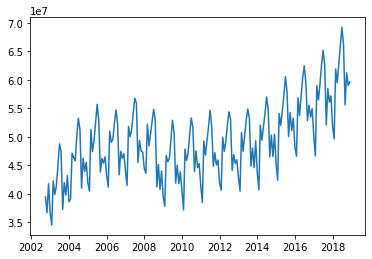

In [0]:
plt.plot(df)

In [0]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(dataset, model='additive')

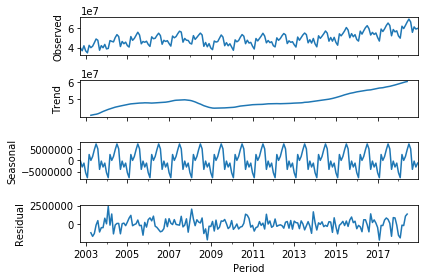

In [0]:
decomposition = sm.tsa.seasonal_decompose(df["Total"], model='additive')

fig = decomposition.plot()

### Q.1.
----Analysis---

From the above figure, we can say following :

#### obs1: Trend is upward trend

#### obs2: Curve is not very fluctuating

#### obs3: Seasonality is present

#### obs4 Trend dropped in 2009.

## Check for stationarity

In [0]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Total'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

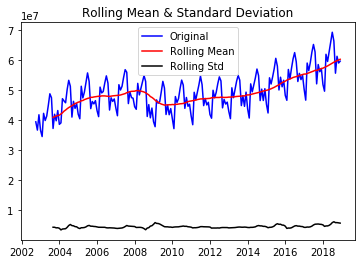

Results of Dickey-Fuller Test:
Test Statistic                  -0.317709
p-value                          0.922958
#Lags Used                      13.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (5%)             -2.877644
Critical Value (10%)            -2.575355
dtype: float64


In [0]:

test_stationarity(df)


# Differencing for stationarity

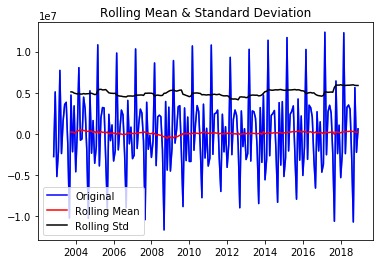

Results of Dickey-Fuller Test:
Test Statistic                  -2.502421
p-value                          0.114886
#Lags Used                      15.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


In [0]:
df_diff = df - df.shift()
plt.plot(df_diff)

df_diff.dropna(inplace=True)
test_stationarity(df_diff)


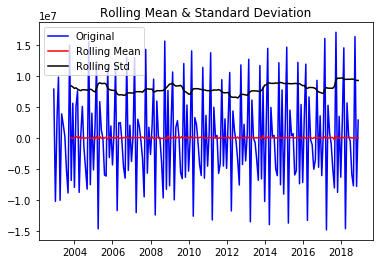

Results of Dickey-Fuller Test:
Test Statistic                -6.207166e+00
p-value                        5.621151e-08
#Lags Used                     1.400000e+01
Number of Observations Used    1.780000e+02
Critical Value (1%)           -3.467632e+00
Critical Value (5%)           -2.877918e+00
Critical Value (10%)          -2.575501e+00
dtype: float64


In [0]:
df_diff = df_diff - df_diff.shift()
df_diff.dropna(inplace=True)
test_stationarity(df_diff)

#### This shows that we need differencing by 2 to make series stationary

# ACF and PACF plots to find p and q

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


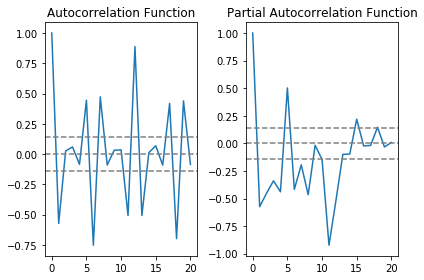

In [0]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

lag_acf = acf(df_diff, nlags=20)
lag_pacf = pacf(df_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


## In ACF plot it comes near 0 when lag is 7 and In PACF plot it comes near 0 when lag is 3

# ARIMA model

In [0]:
!pip install pmdarima

     |████████████████████████████████| 1.1MB 2.8MB/s 


In [0]:

from pmdarima.arima import auto_arima
model = auto_arima(df, error_action='ignore', suppress_warnings=True,start_p = 0, start_q = 0, max_p = 8, max_q = 5, seasonal = False)
model.fit(df)


ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(7, 1, 3),
      out_of_sample_size=0, scoring='mse', scoring_args=None,
      seasonal_order=None, solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [0]:
import re
summary_string = str(model.summary())
param = re.findall('ARIMA\(([0-9]+), ([0-9]+), ([0-9]+)',summary_string)
p,d,q = int(param[0][0]) , int(param[0][1]) , int(param[0][2])
print(p,d,q)

7 1 3


In [0]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  194
Model:                 ARIMA(7, 1, 3)   Log Likelihood               -3116.631
Method:                       css-mle   S.D. of innovations        2197487.612
Date:                Thu, 28 Nov 2019   AIC                           6257.262
Time:                        14:17:24   BIC                           6296.477
Sample:                             1   HQIC                          6273.141
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.039e+05    4.8e+04      2.164      0.032    9786.179    1.98e+05
ar.L1.D.y      0.3208      0.018     17.876      0.000       0.286       0.356
ar.L2.D.y      0.0724      0.046      1.566      0.119      -0.018       0.163
ar.L3.D.y     -0.0625      0.051     -1.220      0.224      -0.163       0.038
ar.L4.D.y     -0.0770      0.055     -1.405      0.162      -0.184       0.030
ar.L5.D.y     -0.0005      0.054     -0.010      0.992      -0.106       0.105
ar.L6.D.y     -0.8032      0.000  -3700.639      0.000      -0.804      -0.803
ar.L7.D.y      0.1797      0.005     32.751      0.000       0.169       0.190
ma.L1.D.y     -1.1143      0.062    -17.946      0.000      -1.236      -0.993
ma.L2.D.y     -0.1028      0.087     -1.183      0.238      -0.273       0.068
ma.L3.D.y      0.6314      0.056     11.328      0.000       0.522       0.741
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8994           -0.5176j            1.0377           -0.4169
AR.2           -0.8994           +0.5176j            1.0377            0.4169
AR.3            0.0207           -1.0721j            1.0723           -0.2469
AR.4            0.0207           +1.0721j            1.0723            0.2469
AR.5            0.8665           -0.4992j            1.0000           -0.0832
AR.6            0.8665           +0.4992j            1.0000            0.0832
AR.7            4.4936           -0.0000j            4.4936           -0.0000
MA.1            0.8731           -0.4877j            1.0001           -0.0811
MA.2            0.8731           +0.4877j            1.0001            0.0811
MA.3           -1.5834           -0.0000j            1.5834           -0.5000
-----------------------------------------------------------------------------
"""

In [0]:
train = df.iloc[:165]
test = df.iloc[165:]

In [0]:
from statsmodels.tsa.arima_model import ARIMA

# AR+I+MA = ARIMA model
model = ARIMA(train,order=(7, 1, 3))
results = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [0]:
test

,Total
Period,
2016-07-01,62465229
2016-08-01,59429934
2016-09-01,52861742
2016-10-01,55553135
2016-11-01,53486298
2016-12-01,54954842
2017-01-01,50319086
2017-02-01,46656963
2017-03-01,58996313


In [0]:
start = len(train)
end = len(train) + len(test) -1

In [0]:
predictions = results.predict(start,end,typ = 'levels').rename('ARIMA Predictions')

In [0]:
predictions

2016-07-01    6.035997e+07
2016-08-01    6.075282e+07
2016-09-01    5.454178e+07
2016-10-01    5.654510e+07
2016-11-01    5.362194e+07
2016-12-01    5.134787e+07
2017-01-01    5.163666e+07
2017-02-01    5.147589e+07
2017-03-01    5.692114e+07
2017-04-01    5.638936e+07
2017-05-01    5.939907e+07
2017-06-01    6.154660e+07
2017-07-01    6.154612e+07
2017-08-01    6.187765e+07
2017-09-01    5.748428e+07
2017-10-01    5.741860e+07
2017-11-01    5.479036e+07
2017-12-01    5.312623e+07
2018-01-01    5.334569e+07
2018-02-01    5.340294e+07
2018-03-01    5.743723e+07
2018-04-01    5.836173e+07
2018-05-01    6.114790e+07
2018-06-01    6.293505e+07
2018-07-01    6.301287e+07
2018-08-01    6.306509e+07
2018-09-01    5.975845e+07
2018-10-01    5.866002e+07
2018-11-01    5.620789e+07
2018-12-01    5.475171e+07
Freq: MS, Name: ARIMA Predictions, dtype: float64

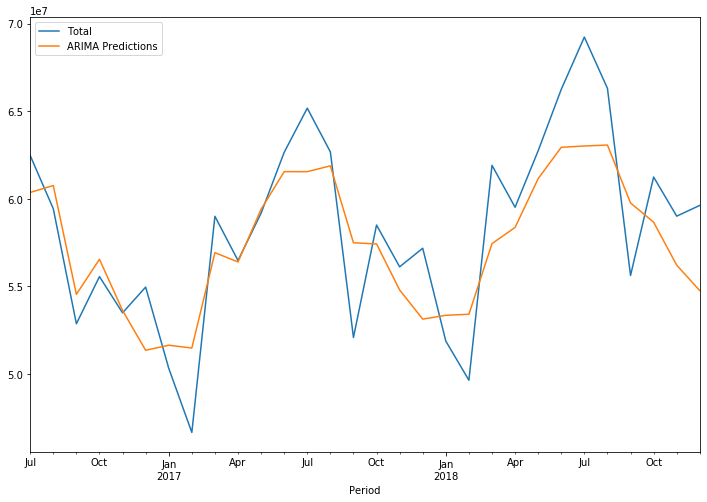

In [0]:
import matplotlib as plt
import pandas
test.plot(legend=True , figsize = (12,8))
predictions.plot(legend= True)

## Predicting into unknown future
we have to pass entire df for predicting next 12 points

In [0]:
model_future = ARIMA(df,order=(7, 1, 3))
results_future = model_future.fit()
predictions_future = results_future.predict(len(df),len(df)+24,typ = 'levels').rename('ARIMA Future Predictions')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [0]:
predictions_future

2019-01-01    5.457552e+07
2019-02-01    5.484158e+07
2019-03-01    6.490090e+07
2019-04-01    6.212310e+07
2019-05-01    6.527928e+07
2019-06-01    6.469102e+07
2019-07-01    6.843508e+07
2019-08-01    6.862679e+07
2019-09-01    6.086508e+07
2019-10-01    6.238011e+07
2019-11-01    5.911221e+07
2019-12-01    5.982415e+07
2020-01-01    5.734780e+07
2020-02-01    5.735808e+07
2020-03-01    6.379955e+07
2020-04-01    6.349898e+07
2020-05-01    6.709823e+07
2020-06-01    6.681226e+07
2020-07-01    6.876366e+07
2020-08-01    6.885278e+07
2020-09-01    6.373401e+07
2020-10-01    6.353801e+07
2020-11-01    6.014618e+07
2020-12-01    6.037492e+07
2021-01-01    5.913242e+07
Freq: MS, Name: ARIMA Future Predictions, dtype: float64

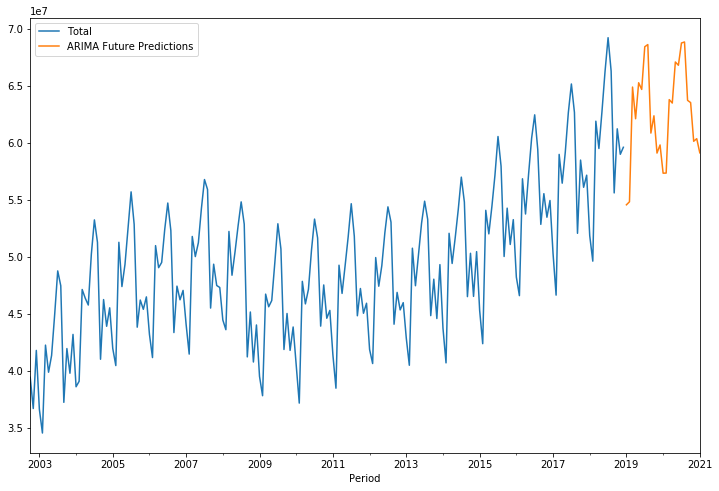

In [0]:
import matplotlib as plt
import pandas
df.plot(legend=True , figsize = (12,8))
predictions_future.plot(legend= True)

In [0]:
predictions_future.to_csv()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


'2019-01-01,54575521.93638391\n2019-02-01,54841584.344523355\n2019-03-01,64900903.54601441\n2019-04-01,62123103.4068052\n2019-05-01,65279277.96425392\n2019-06-01,64691020.13252544\n2019-07-01,68435081.96652195\n2019-08-01,68626786.46716663\n2019-09-01,60865075.044655226\n2019-10-01,62380110.703434065\n2019-11-01,59112211.67572444\n2019-12-01,59824150.27430156\n2020-01-01,57347797.53349506\n2020-02-01,57358080.43325198\n2020-03-01,63799549.022424005\n2020-04-01,63498977.69380649\n2020-05-01,67098228.24653072\n2020-06-01,66812257.72335634\n2020-07-01,68763660.00152953\n2020-08-01,68852781.80892995\n2020-09-01,63734006.97965905\n2020-10-01,63538012.79677077\n2020-11-01,60146178.50205623\n2020-12-01,60374921.00033823\n2021-01-01,59132417.40245025\n'

## SARIMAX

In [0]:
import statsmodels.api as sm

In [0]:

from pmdarima.arima import auto_arima
model = auto_arima(df, trace=True, error_action='ignore', suppress_warnings=True,seasonal = True , m=12)
model.fit(df)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=5609.733, BIC=5635.365, Fit time=3.592 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5626.239, BIC=5632.648, Fit time=0.033 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5616.653, BIC=5629.469, Fit time=0.438 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5618.999, BIC=5631.815, Fit time=0.493 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=5617.717, BIC=5640.145, Fit time=2.733 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 1, 1, 12); AIC=5607.927, BIC=5636.763, Fit time=13.477 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 1, 0, 12); AIC=5619.800, BIC=5645.432, Fit time=5.783 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 1, 2, 12); AIC=5608.806, BIC=5640.846, Fit time=10.080 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 0, 12); AIC=5617.806, BIC=5640.234, Fit time=3.030 seconds
Fit ARIMA: order=(1, 1, 2)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(2, 1, 3),
      out_of_sample_size=0, scoring='mse', scoring_args=None,
      seasonal_order=(1, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [0]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  195
Model:             SARIMAX(2, 1, 3)x(1, 1, 1, 12)   Log Likelihood               -2785.788
Date:                            Thu, 28 Nov 2019   AIC                           5589.577
Time:                                    14:21:12   BIC                           5618.413
Sample:                                         0   HQIC                          5601.266
                                            - 195                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -2.13e+04   4.23e+04     -0.503      0.615   -1.04e+05    6.17e+04
ar.L1         -1.7698      0.027    -66.619      0.000      -1.822      -1.718
ar.L2         -0.9102      0.023    -40.448      0.000      -0.954      -0.866
ma.L1          1.6388      0.033     49.840      0.000       1.574       1.703
ma.L2          0.8053      0.040     20.073      0.000       0.727       0.884
ma.L3         -0.0376      0.022     -1.688      0.091      -0.081       0.006
ar.S.L12       0.7934      0.109      7.279      0.000       0.580       1.007
ma.S.L12      -0.8608      0.099     -8.666      0.000      -1.056      -0.666
sigma2      1.043e+12   2.77e-05   3.77e+16      0.000    1.04e+12    1.04e+12
===================================================================================
Ljung-Box (Q):                       78.85   Jarque-Bera (JB):                 3.11
Prob(Q):                              0.00   Prob(JB):                         0.21
Heteroskedasticity (H):               0.92   Skew:                             0.01
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.72e+34. Standard errors may be unstable.
"""

## Now using statsmodel for SARIMAX with parameters which we obtained from above autoarima

In [0]:
model = sm.tsa.statespace.SARIMAX(df,order = (2,1,3) , seasonal_order = (1,1,1,12))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [0]:
results = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Total   No. Observations:                  195
Model:             SARIMAX(2, 1, 3)x(1, 1, 1, 12)   Log Likelihood               -2785.330
Date:                            Thu, 28 Nov 2019   AIC                           5586.660
Time:                                    14:21:18   BIC                           5612.292
Sample:                                10-01-2002   HQIC                          5597.051
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7827      0.025    -71.740      0.000      -1.831      -1.734
ar.L2         -0.9183      0.021    -43.324      0.000      -0.960      -0.877
ma.L1          1.6392      0.034     48.517      0.000       1.573       1.705
ma.L2          0.7979      0.039     20.680      0.000       0.722       0.873
ma.L3         -0.0348      0.022     -1.597      0.110      -0.077       0.008
ar.S.L12       0.6714      0.125      5.369      0.000       0.426       0.916
ma.S.L12      -0.7611      0.123     -6.207      0.000      -1.001      -0.521
sigma2      1.043e+12   6.25e-14   1.67e+25      0.000    1.04e+12    1.04e+12
===================================================================================
Ljung-Box (Q):                       76.79   Jarque-Bera (JB):                 5.15
Prob(Q):                              0.00   Prob(JB):                         0.08
Heteroskedasticity (H):               0.87   Skew:                            -0.01
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.06e+40. Standard errors may be unstable.
"""

In [0]:
len(df)

195

In [0]:
train = df.iloc[:165]
test = df.iloc[165:]

# Now training on train set

In [0]:
model = sm.tsa.statespace.SARIMAX(train,order = (2,1,3) , seasonal_order = (1,1,1,12))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [0]:
results = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Total   No. Observations:                  165
Model:             SARIMAX(2, 1, 3)x(1, 1, 1, 12)   Log Likelihood               -2325.178
Date:                            Thu, 28 Nov 2019   AIC                           4666.356
Time:                                    14:21:23   BIC                           4690.547
Sample:                                10-01-2002   HQIC                          4676.183
                                     - 06-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7639      0.029    -61.275      0.000      -1.820      -1.708
ar.L2         -0.9000      0.024    -38.160      0.000      -0.946      -0.854
ma.L1          1.6668      0.040     41.712      0.000       1.588       1.745
ma.L2          0.8444      0.052     16.298      0.000       0.743       0.946
ma.L3         -0.0175      0.028     -0.633      0.527      -0.072       0.037
ar.S.L12       0.7721      0.113      6.806      0.000       0.550       0.994
ma.S.L12      -0.8514      0.105     -8.144      0.000      -1.056      -0.646
sigma2      1.024e+12   6.36e-14   1.61e+25      0.000    1.02e+12    1.02e+12
===================================================================================
Ljung-Box (Q):                       64.90   Jarque-Bera (JB):                 3.16
Prob(Q):                              0.01   Prob(JB):                         0.21
Heteroskedasticity (H):               0.76   Skew:                             0.17
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.43e+40. Standard errors may be unstable.
"""

In [0]:
start = len(train)
end = len(train) + len(test) -1

In [0]:
predictions = results.predict(start,end,type='levels' ).rename('SARIMA Predictions')

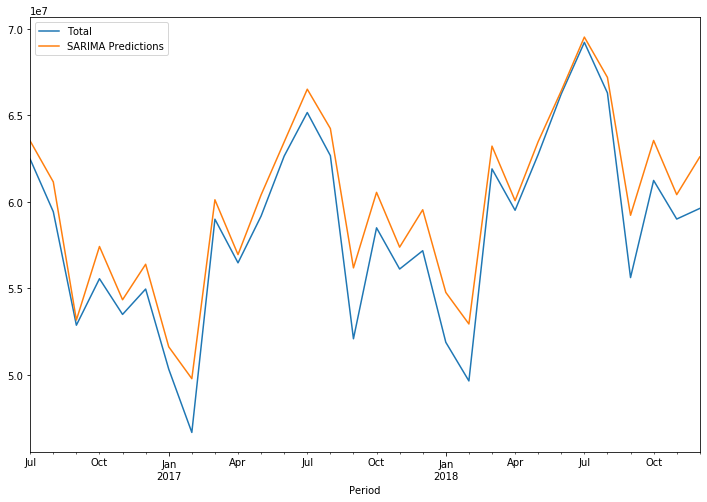

In [0]:
import matplotlib as plt
import pandas
test.plot(legend=True , figsize = (12,8))
predictions.plot(legend= True)